<a href="https://colab.research.google.com/github/Hyuna13/Data_Science/blob/master/EDA_basic3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving broadcast.csv to broadcast.csv


In [3]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('broadcast.csv', index_col=0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


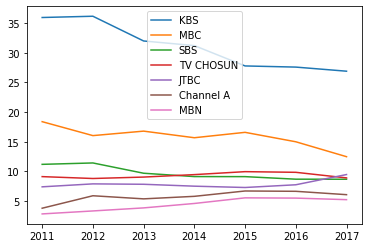

In [8]:
df.plot()

In [9]:
df['KBS'] + df['MBC'] + df['SBS'] + df['TV CHOSUN'] + df['JTBC'] + df['Channel A'] + df['MBN']

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [12]:
df.sum(axis='columns')

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [13]:
df['Total'] = df.sum(axis='columns') #새컬럼만들기
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,88.560
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,89.440
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,84.451
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,83.259
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,82.854
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,80.891
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,77.626


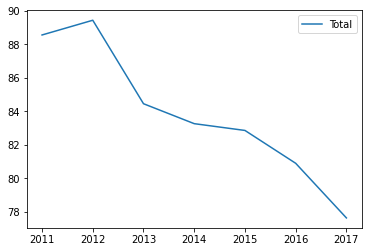

In [14]:
df.plot(y='Total') #TV시청률 갈수록 떨어짐

In [20]:
#지상파와 종편 비교
df['Group 1'] = df.loc[:,'KBS':'SBS'].sum(axis='columns')
df['Group 2'] = df.loc[:,'TV CHOSUN':'MBN'].sum(axis='columns')

In [21]:
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total,Group 1,Group 2
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,88.560,65.498,23.062
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,89.440,63.593,25.847
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,84.451,58.440,26.011
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,83.259,55.981,27.278
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,82.854,53.449,29.405
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,80.891,51.234,29.657
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,77.626,48.016,29.610


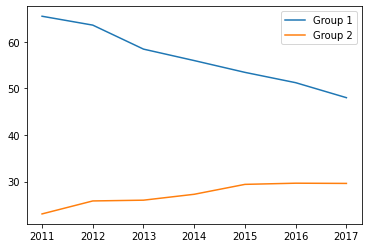

In [23]:
df.plot(y=['Group 1','Group 2']) #종편 시청률은 올라감

In [24]:
from google.colab import files
uploaded = files.upload()

Saving albums.csv to albums.csv


In [27]:
df = pd.read_csv('albums.csv', encoding='latin1')
df

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara..."
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [29]:
#문자열 필터링
df['Genre'].unique() #장르 종류

array(['Rock', 'Rock, Pop', 'Funk / Soul', 'Rock, Blues', 'Jazz',
       'Jazz, Rock, Blues, Folk, World, & Country', 'Funk / Soul, Pop',
       'Blues', 'Pop', 'Rock, Folk, World, & Country',
       'Folk, World, & Country', 'Classical, Stage & Screen', 'Reggae',
       'Hip Hop', 'Jazz, Funk / Soul', 'Rock, Funk / Soul, Pop',
       'Electronic, Rock',
       'Jazz, Rock, Funk / Soul, Folk, World, & Country',
       'Jazz, Rock, Funk / Soul, Pop, Folk, World, & Country',
       'Funk / Soul, Stage & Screen',
       'Electronic, Rock, Funk / Soul, Stage & Screen',
       'Rock, Funk / Soul', 'Rock, Reggae', 'Jazz, Pop',
       'Funk / Soul, Folk, World, & Country', 'Latin, Funk / Soul',
       'Funk / Soul, Blues',
       'Reggae,ï¿½Pop,ï¿½Folk, World, & Country,ï¿½Stage & Screen',
       'Electronic,ï¿½Stage & Screen', 'Jazz, Rock, Funk / Soul, Blues',
       'Jazz, Rock', 'Rock, Latin, Funk / Soul', 'Electronic, Rock, Pop',
       'Hip Hop, Rock, Funk / Soul', 'Electronic, Pop',
   

In [31]:
#Blues가 포함된 장르 모두 출력
df[df['Genre'].str.contains('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock
49,50,1957,Here's Little Richard,Little Richard,"Rock, Blues","Rock & Roll, Rhythm & Blues"
54,55,1968,Electric Ladyland,The Jimi Hendrix Experience,"Rock, Blues","Electric Blues, Psychedelic Rock"
59,60,1969,Trout Mask Replica,Captain Beefheart & His Magic Band,"Rock, Blues","Dialogue, Field Recording, Avantgarde, Electri..."
101,102,1966,Fresh Cream,Cream,"Rock, Blues","Blues Rock, Electric Blues"
118,119,1960,At Last!,Etta James,"Funk / Soul, Blues","Rhythm & Blues, Soul"


In [32]:
#Blues가 앞에오는 장르 모두 출력
df[df['Genre'].str.startswith('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
277,278,1997,Anthology of American Folk Music,Various,"Blues, Folk, World, & Country","Cajun, Country, Field Recording, Gospel, Delta..."
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [33]:
df['Contains Blues'] = df['Genre'].str.contains('Blues')
df

,Number,Year,Album,Artist,Genre,Subgenre,Contains Blues
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",False
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",False
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",False
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",False
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,False
...,...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock,False
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara...",False
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock,False
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues,True


In [34]:
from google.colab import files 
uploaded = files.upload()

Saving parks.csv to parks.csv


In [35]:
df = pd.read_csv('parks.csv')
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438
...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340


In [40]:
#문자열 분리
address = df['소재지도로명주소'].str.split(n=1, expand=True)
address

,0,1
0,광주광역시,북구 대천로 86
1,광주광역시,북구 삼정로 36
2,광주광역시,북구 임방울대로 877
3,광주광역시,북구 일곡로 55
4,광주광역시,북구 설죽로 526
...,...,...
8117,충청남도,홍성군 홍성읍 오관리 472 일원
8118,경상북도,영양군 영양읍 군민회관길 42-6
8119,경상북도,영양군 입암면 신구리 산27-5번지
8120,경상북도,영양군 수비면 발리리 산48번지


In [42]:
df['관할구역'] = address[0]
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시
...,...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268,충청남도
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340,경상북도
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340,경상북도
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340,경상북도


In [44]:
number = df['전화번호'].str.split(pat='-',n=2, expand=True)
number

,0,1,2
0,062,410,6438
1,062,410,6438
2,062,410,6438
3,062,410,6438
4,062,410,6438
...,...,...,...
8117,041,630,1268
8118,054,680,6340
8119,054,680,6340
8120,054,680,6340


In [46]:
df['지역번호'] = number[0]
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역,지역번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시,062
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시,062
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시,062
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시,062
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시,062
...,...,...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268,충청남도,041
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340,경상북도,054
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340,경상북도,054
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340,경상북도,054
